# Chapter 8: Exercise 10

## a


In [1]:
library(ISLR)
data(Hitters)
# summary(Hitters)
sum(is.na(Hitters$Salary))

Warning message:
“package ‘ISLR’ was built under R version 3.4.2”

[1] 59

In [2]:
Hitters = na.omit(Hitters)
sum(is.na(Hitters$Salary))

[1] 0

In [3]:
Hitters$Salary = log(Hitters$Salary)

## b

In [4]:
Hitters.train = head(Hitters,200)
Hitters.test = tail(Hitters,-200)

## c

In [5]:
library(gbm)
set.seed(1)
p = seq(-10, -0.1, by = 0.1)
n = length(p)
lambda = 10^p
boost.train_errors = rep(1, n)
boost.test_errors = rep(1, n)

Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


In [6]:
for (i in 1:n) 
{
    boost.fit = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambda[i])
    boost.train_pred = predict(boost.fit, Hitters.train, n.trees = 1000)
    boost.test_pred = predict(boost.fit, Hitters.test, n.trees = 1000)
    boost.train_errors[i] = mean((Hitters.train$Salary - boost.train_pred)^2)
    boost.test_errors[i] = mean((Hitters.test$Salary - boost.test_pred)^2)
}


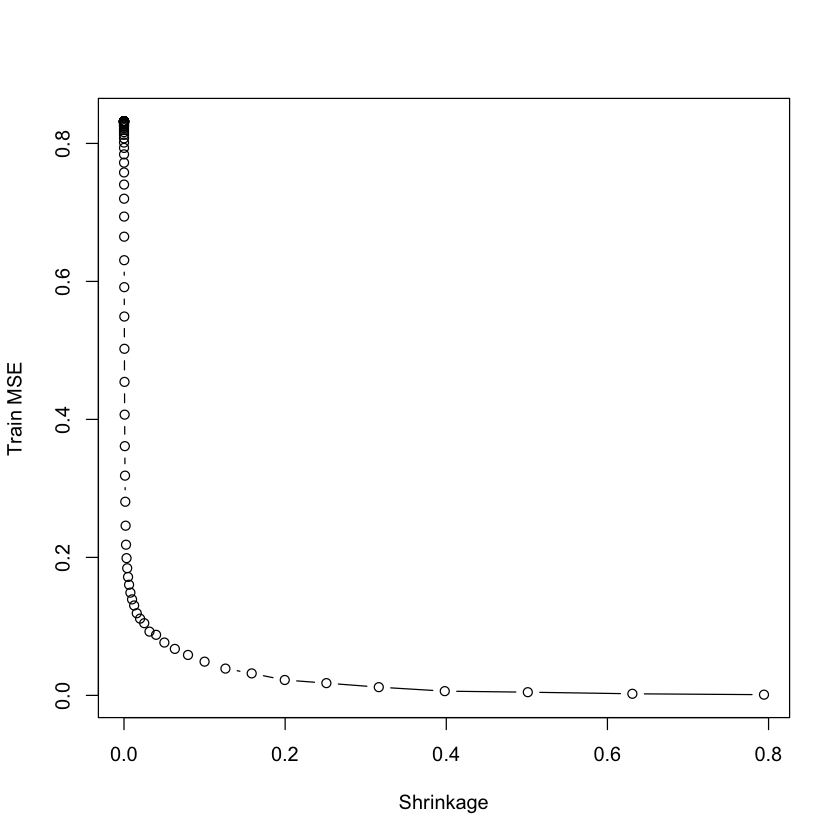

In [7]:
plot(lambda, boost.train_errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE")

## d

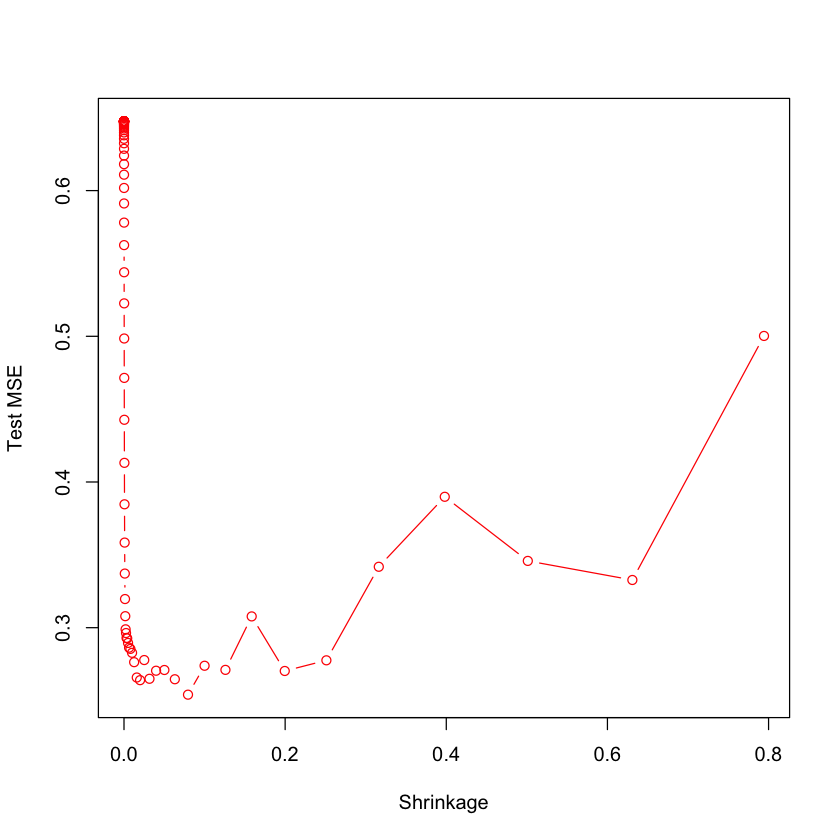

In [8]:
plot(lambda, boost.test_errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", col = "red")

## e

In [9]:
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 0.4917959

In [10]:
library(glmnet)
set.seed(1)
xtrain = model.matrix(Salary ~ ., data = Hitters.train)
ytrain = Hitters.train$Salary
xtest = model.matrix(Salary ~ ., data = Hitters.test)
lasso.fit = glmnet(xtrain, ytrain, alpha = 1)
lasso.pred = predict(lasso.fit, s = 0.01, newx = xtest)
mean((Hitters.test$Salary - lasso.pred)^2)

Warning message:
“package ‘glmnet’ was built under R version 3.4.4”Loading required package: Matrix
Loading required package: foreach
Warning message:
“package ‘foreach’ was built under R version 3.4.3”Loaded glmnet 2.0-16



[1] 0.4700537

The test MSE of boosting is lower than both of the regression methods.

## f

,var,rel.inf
CAtBat,CAtBat,16.4028631
CRuns,CRuns,15.0957847
PutOuts,PutOuts,9.4543457
CWalks,CWalks,6.7508573
CRBI,CRBI,6.4133341
CHmRun,CHmRun,6.0778920
Walks,Walks,6.0434466
Years,Years,5.9694890
Hits,Hits,4.9492273
Assists,Assists,4.5706789


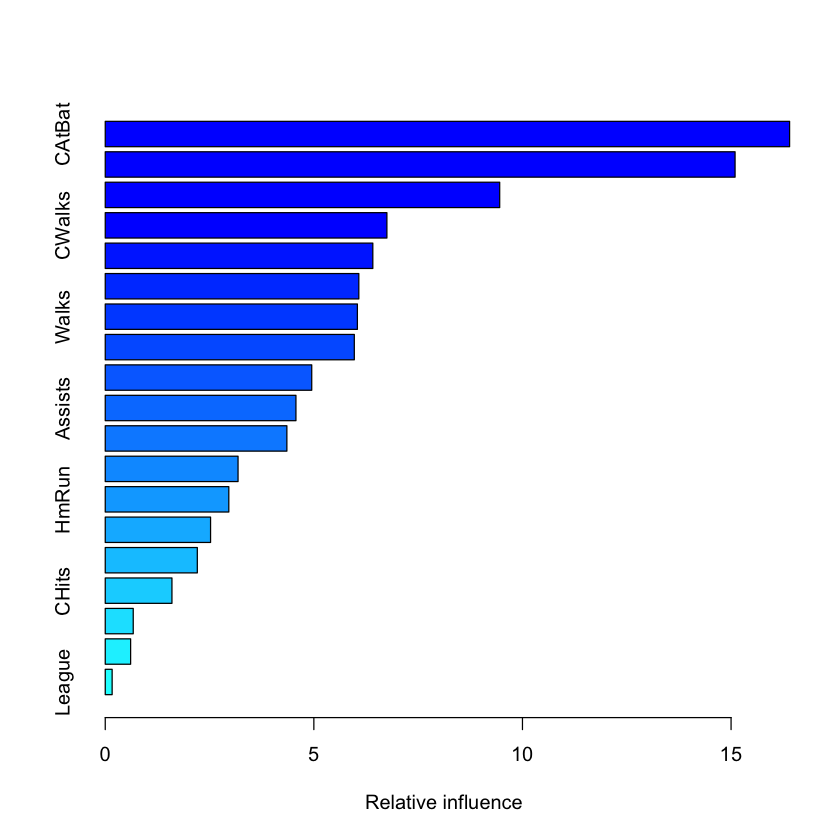

In [11]:
best_lambda = lambda[which.min(boost.test_errors)]
boost.best = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
    n.trees = 1000, shrinkage = best_lambda)
summary(boost.best)

`CAtBat`,`CRuns`,`PutOuts` are most important predictors in the boosted model.

## g

In [12]:
library(rpart)
library(ipred)
bagging.fit = bagging(Salary ~ ., data = Hitters.train, coob=TRUE)
bagging.pred = predict(bagging.fit, Hitters.test)
mean((Hitters.test$Salary - bagging.pred)^2)

[1] 0.2784605

# Chapter 8, Exercise 11 (p. 335)

## a

In [114]:
library(ISLR)
data(Caravan)
train = 1:1000
Caravan$Purchase = ifelse(Caravan$Purchase == "Yes", 1, 0)
Caravan.train = Caravan[train, ]
Caravan.test = Caravan[-train, ]

In [118]:
sum(Caravan.test$Purchase==1)

[1] 289

## b

In [39]:
library(gbm)
set.seed(1)
boost.fit = gbm(Purchase ~ ., data = Caravan.train, n.trees = 1000, shrinkage = 0.01)

Distribution not specified, assuming bernoulli ...


Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
“variable 50: PVRAAUT has no variation.”Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
“variable 71: AVRAAUT has no variation.”

,var,rel.inf
PPERSAUT,PPERSAUT,14.6350478
MKOOPKLA,MKOOPKLA,9.4709165
MOPLHOOG,MOPLHOOG,7.3145742
MBERMIDD,MBERMIDD,6.0865197
PBRAND,PBRAND,4.6676612
MGODGE,MGODGE,4.4946326
ABRAND,ABRAND,4.3242776
MINK3045,MINK3045,4.1759062
MOSTYPE,MOSTYPE,2.8640258
PWAPART,PWAPART,2.7819107


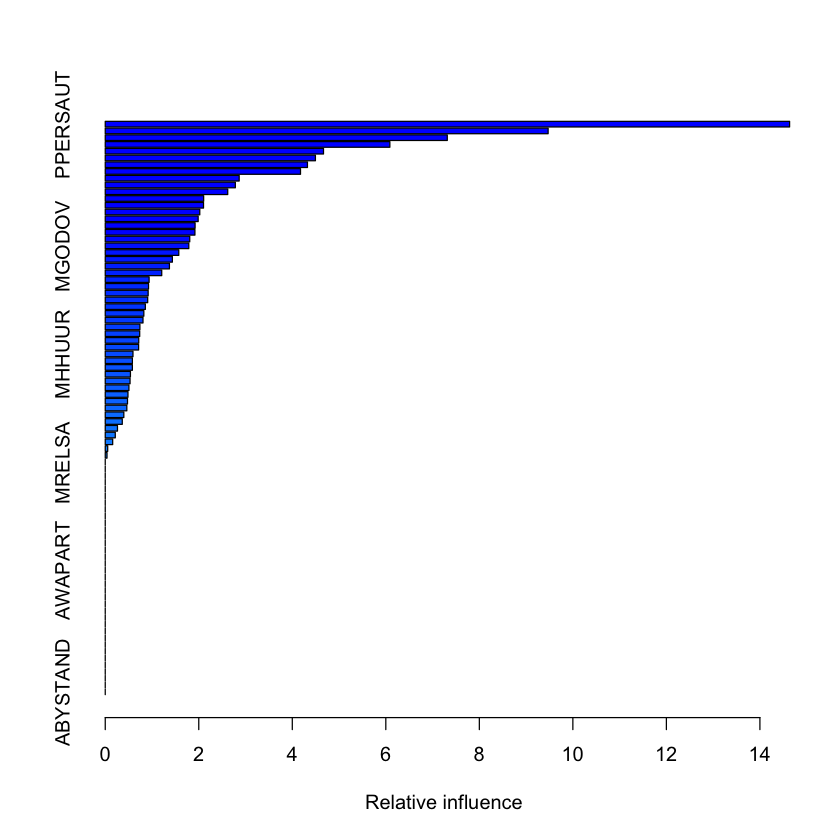

In [42]:
summary(boost.fit)

`PPERSAUT`, `MKOOPKLA` and `MOPLHOOG` are the most important predictors

## c

In [47]:
boost.prob = predict(boost.fit, Caravan.test, n.trees = 1000, type = "response")
boost.pred = ifelse(boost.prob > 0.2, 1, 0)
table(Caravan.test$Purchase, boost.pred)

   boost.pred
       0    1
  0 4410  123
  1  256   33

In [48]:
33/(33+123)

[1] 0.2115385

21.1% of the people predicted to make a purchase by boosting model do make one.

**KNN:**

In [52]:
library(class)
knn.pred = knn(Caravan.train, Caravan.test, Caravan.train$Purchase, k = 3, l = 0, prob = FALSE, use.all = TRUE)
table(Caravan.test$Purchase, knn.pred)

   knn.pred
       0    1
  0 4474   59
  1  279   10

In [53]:
10/(59+10)

[1] 0.1449275

**Logistic:**

In [59]:
lm.fit = glm(as.factor(Purchase) ~ .-Purchase, data = Caravan.train, family = binomial)
lm.prob = predict(lm.fit, Caravan.test, type = "response")
lm.pred = ifelse(lm.prob > 0.2, 1, 0)
table(Caravan.test$Purchase, lm.pred)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

   lm.pred
       0    1
  0 4183  350
  1  231   58

In [60]:
58/(350 + 58)

[1] 0.1421569

The fraction by boosting is higher.

# Chapter 9, Exercise 1 (p. 368)


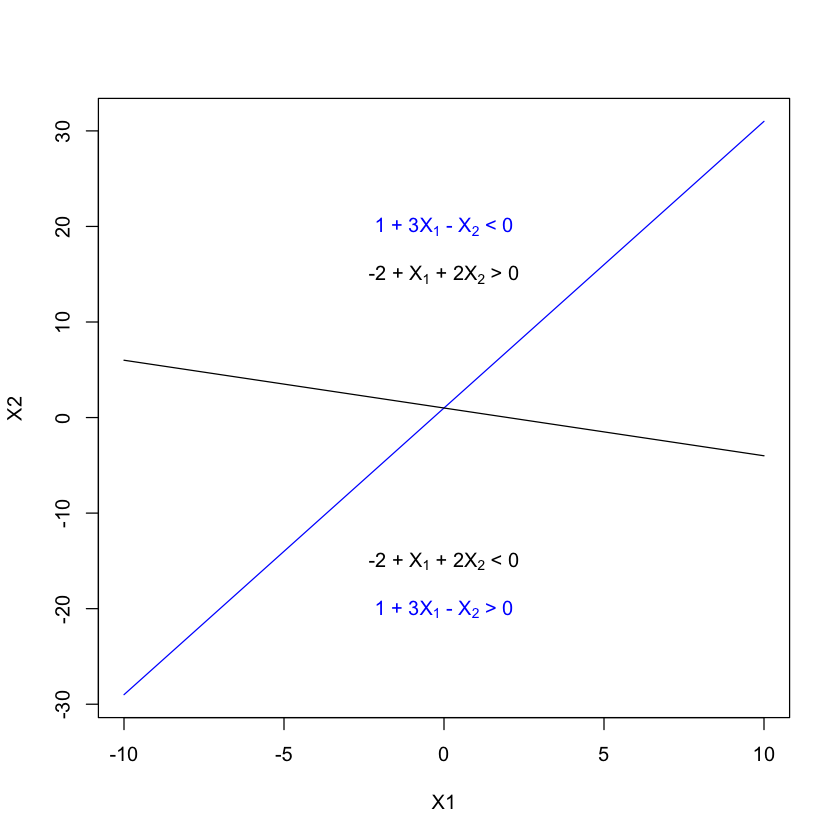

In [76]:
X1 = -10:10
X2 = 1 + 3 * X1
plot(X1, X2, type = "l", col = "blue")
text(c(0), c(-20), TeX("1 + 3X_1 - X_2 > 0"), col = "blue")
text(c(0), c(20), TeX("1 + 3X_1 - X_2 < 0"), col = "blue")
lines(X1, 1 - X1/2)
text(c(0), c(-15), TeX("-2 + X_1 + 2X_2 < 0"))
text(c(0), c(15), TeX("-2 + X_1 + 2X_2 > 0"))

# Chapter 9, Exercise 8 (p. 371)

In [77]:
library(ISLR)
data(OJ)

## a

In [80]:
istrain = sample(nrow(OJ), 800)
OJ.train = OJ[istrain, ]
OJ.test = OJ[-istrain, ]

## b

In [89]:
library(e1071)
svm.fit = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.fit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  419

 ( 209 210 )


Number of Classes:  2 

Levels: 
 CH MM




Support vector classifier has 419 support vectors (209 CH, 210 MM) out of 800 training points. 

## c

Training Error Rate:

In [91]:
train.pred = predict(svm.fit, OJ.train)
table(OJ.train$Purchase, train.pred)
mean(OJ.train$Purchase != train.pred)

    train.pred
      CH  MM
  CH 443  56
  MM  71 230

[1] 0.15875

Test Error Rate:

In [92]:
test.pred = predict(svm.fit, OJ.test)
table(OJ.test$Purchase, test.pred)
mean(OJ.test$Purchase != test.pred)

    test.pred
      CH  MM
  CH 133  21
  MM  34  82

[1] 0.2037037

## d

In [95]:
set.seed(1)
svm.tune = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(svm.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.15625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.16750 0.02838231
2   0.01778279 0.17125 0.02208726
3   0.03162278 0.17000 0.02776389
4   0.05623413 0.16375 0.02729087
5   0.10000000 0.15625 0.03076005
6   0.17782794 0.15750 0.03446012
7   0.31622777 0.16250 0.03173239
8   0.56234133 0.15875 0.03283481
9   1.00000000 0.15875 0.03120831
10  1.77827941 0.16000 0.02622022
11  3.16227766 0.16000 0.03106892
12  5.62341325 0.16250 0.03061862
13 10.00000000 0.15625 0.02585349


## e

In [108]:
svm.fit_best = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.1)
train.pred = predict(svm.fit_best, OJ.train)
table(OJ.train$Purchase, train.pred)
train_error = mean(OJ.train$Purchase != train.pred)
train_error
test.pred = predict(svm.fit_best, OJ.test)
table(OJ.test$Purchase, test.pred)
test_error = mean(OJ.test$Purchase != test.pred)
test_error

    train.pred
      CH  MM
  CH 444  55
  MM  66 235

[1] 0.15125

    test.pred
      CH  MM
  CH 134  20
  MM  32  84

[1] 0.1925926

## f

In [102]:
library(e1071)
svm.fit = svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = 0.01)
summary(svm.fit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  604

 ( 301 303 )


Number of Classes:  2 

Levels: 
 CH MM




In [103]:
train.pred = predict(svm.fit, OJ.train)
table(OJ.train$Purchase, train.pred)
train_error = mean(OJ.train$Purchase != train.pred)
train_error
test.pred = predict(svm.fit_best, OJ.test)
table(OJ.test$Purchase, test.pred)
test_error = mean(OJ.test$Purchase != test.pred)
test_error

    train.pred
      CH  MM
  CH 499   0
  MM 301   0

[1] 0.37625

    test.pred
      CH  MM
  CH 134  20
  MM  32  84

[1] 0.1925926

In [104]:
set.seed(1)
svm.tune = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(svm.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.15625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.37625 0.05876330
2   0.01778279 0.37625 0.05876330
3   0.03162278 0.36375 0.06599926
4   0.05623413 0.20375 0.03175973
5   0.10000000 0.17625 0.03606033
6   0.17782794 0.17500 0.03061862
7   0.31622777 0.16250 0.03173239
8   0.56234133 0.15625 0.03498512
9   1.00000000 0.15625 0.03644345
10  1.77827941 0.15625 0.02901748
11  3.16227766 0.16500 0.02024160
12  5.62341325 0.16375 0.02972676
13 10.00000000 0.16875 0.03346329


In [107]:
svm.fit_best = svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = 0.5623413)
train.pred = predict(svm.fit_best, OJ.train)
table(OJ.train$Purchase, train.pred)
train_error = mean(OJ.train$Purchase != train.pred)
train_error
test.pred = predict(svm.fit_best, OJ.test)
table(OJ.test$Purchase, test.pred)
test_error = mean(OJ.test$Purchase != test.pred)
test_error

    train.pred
      CH  MM
  CH 460  39
  MM  72 229

[1] 0.13875

    test.pred
      CH  MM
  CH 138  16
  MM  35  81

[1] 0.1888889

## g

In [111]:
svm.fit = svm(Purchase ~ ., kernel = "poly", degree = 2, data = OJ.train, cost = 0.01)
summary(svm.fit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  606

 ( 301 305 )


Number of Classes:  2 

Levels: 
 CH MM




In [112]:
train.pred = predict(svm.fit, OJ.train)
table(OJ.train$Purchase, train.pred)
train_error = mean(OJ.train$Purchase != train.pred)
train_error
test.pred = predict(svm.fit_best, OJ.test)
table(OJ.test$Purchase, test.pred)
test_error = mean(OJ.test$Purchase != test.pred)
test_error

    train.pred
      CH  MM
  CH 499   0
  MM 301   0

[1] 0.37625

    test.pred
      CH  MM
  CH 134  20
  MM  32  84

[1] 0.1925926

In [113]:
svm.fit_best = svm(Purchase ~ ., kernel = "poly", degree = 2, data = OJ.train, cost = 0.5623413)
train.pred = predict(svm.fit_best, OJ.train)
table(OJ.train$Purchase, train.pred)
train_error = mean(OJ.train$Purchase != train.pred)
train_error
test.pred = predict(svm.fit_best, OJ.test)
table(OJ.test$Purchase, test.pred)
test_error = mean(OJ.test$Purchase != test.pred)
test_error

    train.pred
      CH  MM
  CH 470  29
  MM 113 188

[1] 0.1775

    test.pred
      CH  MM
  CH 142  12
  MM  51  65

[1] 0.2333333

Overall, radial basis kernel gives the best result on this data.